In [160]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gsw
from argopy import DataFetcher as ArgoDataFetcher 
%matplotlib inline

In [ ]:
lon_w = -97.5
lon_e = -82.5
lat_s = 18
lat_n = 30

In [105]:
argo_loader = ArgoDataFetcher()
ds = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2010-01-01', '2011-12-31']).to_xarray()
ds_profiles = ds.argo.point2profile()

In [106]:
ds1 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2011-01-01', '2012-12-31']).to_xarray()
ds1_profiles = ds1.argo.point2profile()

In [108]:
ds12 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2013-01-01', '2013-12-31']).to_xarray()
ds12_profiles = ds12.argo.point2profile()

In [109]:
ds13 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2014-01-01', '2014-12-31']).to_xarray()
ds13_profiles = ds13.argo.point2profile()

In [114]:
ds2 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2015-01-01', '2015-12-31']).to_xarray()
ds2_profiles = ds2.argo.point2profile()

In [116]:
ds3 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2016-01-01', '2016-12-31']).to_xarray()
ds3_profiles = ds3.argo.point2profile()

In [117]:
ds4 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2017-01-01', '2017-12-31']).to_xarray()
ds4_profiles = ds4.argo.point2profile()

In [121]:
ds5 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2018-01-01', '2018-06-30']).to_xarray()
ds5_profiles = ds5.argo.point2profile()

In [122]:
ds52 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2018-07-01', '2018-12-31']).to_xarray()
ds52_profiles = ds52.argo.point2profile()

In [124]:
ds6 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2019-01-01', '2019-06-30']).to_xarray()
ds6_profiles = ds6.argo.point2profile()

In [125]:
ds62 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2019-07-01', '2019-12-31']).to_xarray()
ds62_profiles = ds62.argo.point2profile()

In [133]:
ds7 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2020-01-01', '2020-04-30']).to_xarray()
ds7_profiles = ds7.argo.point2profile()

In [135]:
ds72 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2020-05-01', '2020-08-31']).to_xarray()
ds72_profiles = ds72.argo.point2profile()

In [136]:
ds73 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2020-09-01', '2020-12-31']).to_xarray()
ds73_profiles = ds73.argo.point2profile()

In [149]:
ds8 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2021-01-01', '2021-03-31']).to_xarray()
ds8_profiles = ds8.argo.point2profile()

In [150]:
ds82 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2021-04-01', '2021-06-30']).to_xarray()
ds82_profiles = ds82.argo.point2profile()

In [153]:
ds83 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2021-07-01', '2021-09-30']).to_xarray()
ds83_profiles = ds83.argo.point2profile()

In [154]:
ds84 = argo_loader.region([lon_w, lon_e, lat_s, lat_n, 0, 1000, '2021-10-01', '2021-12-31']).to_xarray()
ds84_profiles = ds84.argo.point2profile()

In [193]:
ds_tot = xr.concat([ds_profiles,ds1_profiles,ds12_profiles,ds13_profiles,\
                    ds2_profiles,ds3_profiles,ds4_profiles,ds5_profiles,ds52_profiles,\
                    ds6_profiles,ds62_profiles,ds7_profiles,ds72_profiles,ds73_profiles,\
                    ds8_profiles,ds82_profiles,ds83_profiles,ds84_profiles],dim='N_PROF')
# # ds_profiles.to_netcdf(path='/Users/jakesteinberg/Desktop/argo_137E.nc',format="NETCDF4")

In [194]:
ds_tot.to_netcdf(path='/Users/jakesteinberg/Documents/NASA_OSTST/argo_2010_2021.nc')

/Users/jakesteinberg/anaconda3/envs/cpt/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/jakesteinberg/anaconda3/envs/cpt/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


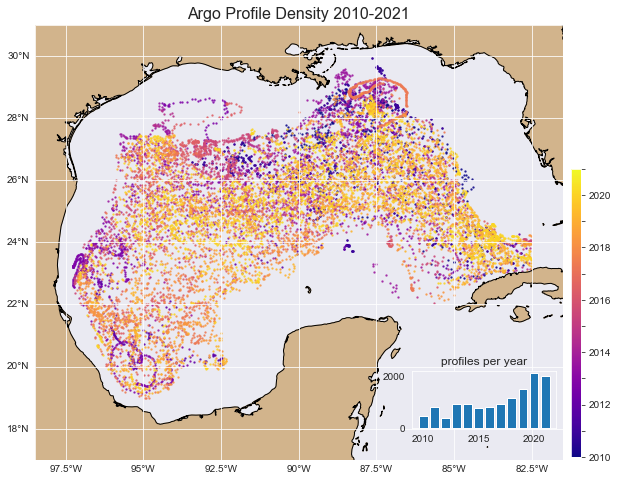

In [199]:
colors = ['r','b','y','k','c','m','g']
cmap = matplotlib.cm.get_cmap('plasma')
years = np.arange(2010,2022)
pcount = np.nan*np.ones(len(years))
f, ax = plt.subplots(1,1,figsize=(10,8), subplot_kw={'projection':ccrs.PlateCarree(central_longitude=0)})
for i in range(len(years)):
    t_s = str(years[i]) + '-01-01'
    t_e = str(years[i]) + '-12-31'
    ti = np.where((ds_tot.TIME > np.datetime64(t_s)) & (ds_tot.TIME < np.datetime64(t_e)))[0]
    t_lon = ds_tot.LONGITUDE.data[ti]
    t_lat = ds_tot.LATITUDE.data[ti]
    out = np.where((t_lon > -90) & (t_lat < 22))[0]
    t_lon[out] = np.nan
    t_lat[out] = np.nan
    pcount[i] = np.sum(~np.isnan(t_lon))
    ax.scatter(t_lon,t_lat, s=2, color=cmap(i/len(years)), transform=ccrs.PlateCarree(), alpha=0.7)
ax.add_feature(cartopy.feature.LAND, color='#D2B48C',zorder=1); ax.coastlines()
gl = ax.gridlines(draw_labels=True); gl.xlabels_top = False; gl.ylabels_right = False;
ax.set_xlim([lon_w-1, lon_e+1]); ax.set_ylim([lat_s-1, lat_n+1])


cbpos = [0.89, 0.13, 0.015, 0.5]; cax = f.add_axes(cbpos); 
cb = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, orientation = 'vertical', ticks=np.linspace(0,1,12))
cb.ax.set_yticklabels(['2010','','2012','','2014','','2016','','2018','','2020',''])
ax.set_title('Argo Profile Density 2010-2021',fontsize=16)
ax.set_xlabel('Longitude',fontsize=14)
ax.set_ylabel('Latitude',fontsize=14)

cbpos01 = [0.67, 0.18, 0.2, 0.1]
ax_i = f.add_axes(cbpos01)
ax_i.bar(years,pcount)
ax_i.set_title('profiles per year')
f.savefig('/Users/jakesteinberg/Documents/NASA_OSTST/manuscript/figures/argo_profile_density.jpg', dpi=250)

In [338]:
ds_tot

<xarray.Dataset>
Dimensions:                (N_LEVELS: 698, N_PROF: 13145)
Coordinates:
  * N_LEVELS               (N_LEVELS) int64 0 1 2 3 4 5 ... 693 694 695 696 697
    LONGITUDE              (N_PROF) float64 -88.47 -86.96 ... -94.33 -94.57
    LATITUDE               (N_PROF) float64 28.93 25.99 26.41 ... 24.06 26.75
    TIME                   (N_PROF) datetime64[ns] 2010-05-24T07:34:56 ... 2021-12-30T12:34:13
  * N_PROF                 (N_PROF) int64 102 318 380 295 433 ... 259 125 70 144
Data variables:
    CONFIG_MISSION_NUMBER  (N_PROF) int64 1 1 1 1 1 1 1 1 ... 10 4 8 7 10 7 11 8
    CYCLE_NUMBER           (N_PROF) int64 2 1 1 1 1 3 ... 52 190 99 190 336 173
    DATA_MODE              (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'R' 'R' 'R' 'R'
    DIRECTION              (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int64 4901265 4901268 ... 4902917 4903248
    POSITION_QC            (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES                   (N_PROF, N_LEVELS) float64 5.7 10.9 15.7 ... nan nan
    PRES_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PSAL                   (N_PROF, N_LEVELS) float64 35.92 35.94 ... nan nan
    PSAL_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP                   (N_PROF, N_LEVELS) float64 26.79 26.24 ... nan nan
    TEMP_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           jakesteinberg
    Fetched_date:         2022/05/13
    Fetched_constraints:  [x=-97.50/-82.50; y=18.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [335]:
float_num = np.unique(ds_tot.PLATFORM_NUMBER)

In [340]:
this_float = float_num[1]
test_temp = ds_tot.TEMP[np.where(ds_tot.PLATFORM_NUMBER==this_float)[0],:].data
test_time = ds_tot.TIME[np.where(ds_tot.PLATFORM_NUMBER==this_float)[0]].data
test_press = ds_tot.PRES[np.where(ds_tot.PLATFORM_NUMBER==this_float)[0]].data

Text(0.5, 1.0, '8.267676806209064')

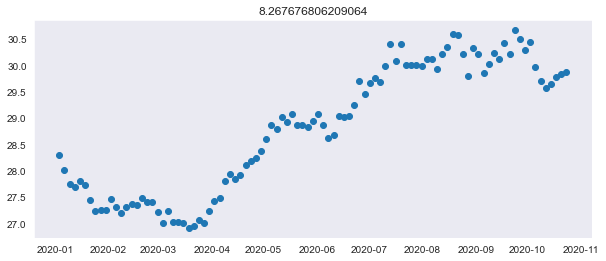

In [341]:
d_i = 5
f, ax = plt.subplots(1,1,figsize=(10,4))
ax.scatter(test_time,test_temp[:,d_i])
ax.set_title(str(np.nanmean(test_press[:,d_i].data)))

In [316]:
print(len(ds_tot.N_PROF))
print(len(np.where(ds_tot.PSAL_QC.data == 1)[0]))
print(len(np.where(ds_tot.POSITION_QC.data == 1)[0]))
print(len(np.where(ds_tot.TEMP_QC.data == 1)[0]))
print(len(np.where(ds_tot.TIME_QC.data == 1)[0]))

13145
12302
13145
13145
13145


In [349]:
p_grid = np.arange(5,1000,20)
rho = np.nan*np.ones((len(p_grid),len(ds_tot.N_PROF.data)))
for i in range(len(ds_tot.N_PROF.data)):
    this_pressure = ds_tot.PRES[i,:]
    if np.nanmax(this_pressure > 950):
        if ds_tot.PSAL_QC[i].data == 1:
            this_temp = ds_tot.TEMP[i,:]
            this_salin = ds_tot.PSAL[i,:]
            good0 = np.where(~np.isnan(this_temp))[0]
            SA = gsw.SA_from_SP(this_salin[good0],this_pressure[good0],ds_tot.LONGITUDE[i],ds_tot.LATITUDE[i])
            CT = gsw.CT_from_t(SA,this_temp[good0],this_pressure[good0])
            rho_nat = gsw.rho(SA,CT,this_pressure)
            good = np.where(~np.isnan(rho_nat))[0]
            rho[:,i] = np.interp(p_grid,this_pressure[good],rho_nat[good])

In [351]:
# data_coords = {'pressure': p_grid, 'time': ds_tot.TIME.data}
# xda = xr.DataArray(data=rho, dims=['pressure','time'], coords=data_coords) 

# define data with variable attributes
data_vars = {'rho':(['pressure','time'], rho, 
                         {'units': 'kg/m^3'})}

# define coordinates
coords = {'pressure': (['pressure'], p_grid), 'time': (['time'],ds_tot.TIME.data),
         'lon': (['time'],ds_tot.LONGITUDE),'lat': (['time'],ds_tot.LATITUDE)}
ds_rho = xr.Dataset(data_vars=data_vars, 
                coords=coords)

In [352]:
ds_rho.to_netcdf(path='/Users/jakesteinberg/Documents/NASA_OSTST/argo_2010_2021_rho.nc')